In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
rd.seed(5)

In [2]:
class TrafficSimulation():
    
    def __init__(self, max_velocity, traffic_density, road_length, p_of_slowing_down):
        
        self.road_length = int(road_length)
        self.max_velocity = max_velocity # speed limit on the road
        
        # Initializing the current state of the road, populating it with random velocities
        self.current_state = np.random.randint(low=1, high=self.max_velocity+1, size=self.road_length)
        self.next_state = np.full(self.road_length, -1)
        
        self.traffic_density = traffic_density
        self.p_of_slowing_down = p_of_slowing_down   

        self.distance_to_next_car = 0
        
        self.time = 0
        
    def populate_cars(self):
        
        # Considering the traffic density, replace some cars with empty spaces, i.e. -1s
        for i in range(self.road_length):
            if rd.uniform(0, 1) > self.traffic_density:
                self.current_state[i] = -1

    
    def update(self):
        
        flow = 0
        
        self.next_state = np.full(self.road_length, -1)

        for i in range(self.road_length):
            
            if self.current_state[i] > -1:  
                velocity = self.current_state[i]
                if velocity < self.max_velocity:
                    velocity += 1
                    
                
                j = i+2+velocity
                self.next_state[i] = velocity
                
                if j >= len(self.current_state):
                    last_indexes = list(range(i+1, self.road_length))
                    beg_indexes = list(range(0, j - self.road_length))
                    indexes = last_indexes + beg_indexes
                else:
                    indexes = list(range(i+1, i+1+velocity))
                '''
                Example:
                
                [-1,1,-1,2,-1]
                for 2, i = 3; len=5, j=6
                    1st indexes: range(4, 4) = [4]
                    2nd indexes: range(0,1) = [0]
                    
                '''
                dist_to_next_car = 0
                for cell_index in indexes:
                    
                    if self.current_state[cell_index] == -1:
                        dist_to_next_car += 1
                    else:
                        break
                
                if dist_to_next_car < velocity:
                    self.next_state[i] = dist_to_next_car
                    
                if rd.uniform(0, 1) <= self.p_of_slowing_down: # random decrease in velocity
                    if  self.next_state[i] != 0:
                        self.next_state[i] -= 1 
                    
            else:
                self.next_state[i] = -1
        
        new_state = [-1 for i in range(self.road_length)]
        
        # Parallel advancing
        for i in range(self.road_length):
            if self.next_state[i] > -1: 
                next_move = self.next_state[i]
                j = i + next_move
                
                if j >= self.road_length:
                    
                    flow += 1
                    
                    last_indexes = list(range(i+1, self.road_length))
                    beg_indexes = list(range(0, j - self.road_length + 1))
                    indexes = last_indexes + beg_indexes
                    
#                     print('next_move{1}, indexes:{2}'.format(velocity, next_move, indexes))
                    next_pos = indexes[next_move-1]
                else:
                    next_pos = j

                new_state[next_pos] =  next_move
                
        self.current_state = new_state
        self.time += 1

        return flow

        
#             '''
#                 [-1,-1,-1,2,-1]
#                 for 2, i = 3; len=5, j=6
#                     1st indexes: range(4, 4) = [4]
#                     2nd indexes: range(0,1) = [0]
#                     indexes: [4, 0]
                    
#                     next_move = 2
                    
#                     next_pos = indexes[next_move - 1] => 0
#                 next_pos = 0
#             '''
            
#             if self.next_state[i] > -1: 
#                 self.next_state[int(i+int(self.next_state[i]))] = int(self.next_state[i]) # advance
    
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.next_state))

In [ ]:
traffic_sim = TrafficSimulation(road_length=50,
                                traffic_density=0.4,
                                max_velocity=5,
                                p_of_slowing_down=0.01)

traffic_sim.populate_cars()

In [ ]:
traffic_sim.current_state

In [ ]:
for i in range(15):
    traffic_sim.update()
    traffic_sim.display()

In [ ]:
repetitions = 15

count = []

for i in range(repetitions):
    count.append(traffic_sim.update())
    
print (count)
print (sum(count)/repetitions) # flow 

In [5]:
# Traffic density

# traffic_density = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
traffic_density = np.arange(0.05, 1, 0.05)
repetitions = 15

flow = []

for i in traffic_density:
    sim = TrafficSimulation(road_length=50, traffic_density=i, max_velocity=5,p_of_slowing_down=0.5)
    sim.populate_cars()
    
    count = []
    
    for x in range(repetitions):
        count.append(sim.update())
    
    flow.append(sum(count)/repetitions)

print (flow)

[0.13333333333333333, 0.2, 0.26666666666666666, 0.3333333333333333, 0.4, 0.26666666666666666, 0.2, 0.26666666666666666, 0.3333333333333333, 0.26666666666666666, 0.06666666666666667, 0.06666666666666667, 0.2, 0.2, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0]


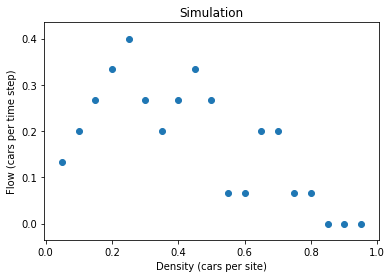

In [7]:
plt.scatter(traffic_density, flow)
plt.xlabel('Density (cars per site)')
plt.ylabel('Flow (cars per time step)')
plt.title('Simulation')
plt.show()